In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from monai.transforms import (
    EnsureChannelFirstd,
    Compose,
    LoadImaged,
    Orientationd,
)

In [37]:
def plot_overlay(arrs, set_title = True, img_min = None , img_max = None):
    fig, ax = plt.subplots(1,len(arrs) , figsize = (8,8))
    
    for i, (title, arr) in enumerate(arrs.items()):
        try:
            img = arr['img']
            if img_min is None:
                img_min = img.min()
            if img_max is None:
                img_max = img.max()
            # Display the grayscale image
            ax[i].imshow(img, cmap='gray',vmin = img_min, vmax = img_max)
        except:
            seg = arr['seg']
            ax[i].imshow(seg, cmap='jet',vmin = 0,vmax = arr['vmax'])
            ax[i].set_xticks([])
            ax[i].set_yticks([])
            if set_title:
                ax[i].set_title(title)
            continue
        try:
            seg = arr['seg']
            segmentation_rgba = np.zeros([i for i in seg.shape] +[4])
            segmentation_rgba[:, :, 0] = seg
            segmentation_rgba[:, :, 3] = 0.5 

            # Overlay the segmentation mask with transparency
            ax[i].imshow(segmentation_rgba, cmap='jet', alpha=0.5)
        except:
            pass

        # Remove axis ticks
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        if set_title:
            ax[i].set_title(title)
            
    plt.tight_layout()
    plt.show()

In [31]:
def reori(data):
    return np.rot90(data,k = 1)

In [7]:
simple_transforms = Compose([
    LoadImaged(keys=['img']),
    EnsureChannelFirstd(keys=['img']),
    Orientationd(keys=['img'], axcodes='RAS'),
])


In [29]:
#load nifti files
img_path = '../sample_data/211397/2001/img.nii.gz'
seg_path = '../output/211397/mean.nii.gz'
std_path = '../output/211397/std.nii.gz'

output = simple_transforms({'img': img_path})
img = output['img'].squeeze().numpy()
output = simple_transforms({'img': seg_path})
seg = output['img'].squeeze().numpy()
output = simple_transforms({'img': std_path})
std = output['img'].squeeze().numpy()

img = np.flip(img,0)
seg = np.flip(seg,0)
std = np.flip(std,0)


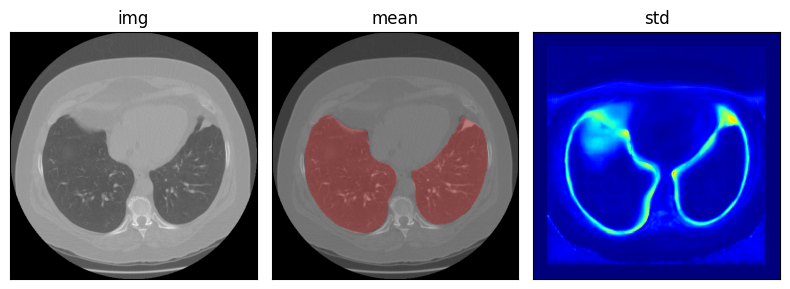

In [48]:
#slice number i
i =100
plot_overlay({'img': {'img': reori(img[:,:,i])}, 
        'mean': { 'img':reori(img[:,:,i]) ,  'seg':reori(seg[:,:,i])},
        'std': { 'seg':reori(std[:,:,i]) , 'vmax': std.max()}})